# DS Challenge


## Dataset
You can find the dataset in the data folder of the repository. The folder contains two files:
* dow_jones_index.data - dataset data
* dow_jones_index.names - dataset information and details

## Business Analysis

The Dow Jones Index is a stock market index tracking the performance of 30 large U.S. companies. The dataset provided contains variables such as quarterly information (1=Jan-Mar; 2=Apr-Jun), stock symbols representing each company, and historical price data (open, high, low, close). Trading volume and percentage changes in price and volume are included. Dividend-related information, such as days to the next dividend and percentage return, is also available. Additionally, the dataset includes variables for predicting future stock prices, such as next week's open and close, as well as the percentage change in price. Analyzing this data can provide insights into quarterly performance, individual stock behavior, price trends, trading volume, and potential dividend income. It also enables the development of predictive models for forecasting stock price movements. This analysis aids in understanding the Dow Jones Index's historical behavior and supports informed investment decisions.



## Data Understanding
During the data understanding phase, you should focus on understanding what each variable represents, compute statistics and visualizations. Some questions that may guide your work follow:
* Feature engineering: should new features be created from the existing ones?
* What will be your features and your label?
* Is the dataset ready for the prediction task? (ex: missing values)
* How will the data be split into train and test sets?

-----

In [2]:
#add here your imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
# Load dataset
df = pd.read_csv("data/dow_jones_index.data", header=0)
# Check if missing values
print(df.isnull().sum(),"\n")
# Check data types
print(df.info())

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                   

In [7]:
# Replace missing values with 0 in the 'percent_change_volume_over_last_wk' and 'previous_weeks_volume' column(no previous trades)
df['percent_change_volume_over_last_wk'].fillna(0, inplace=True)
df['previous_weeks_volume'].fillna(0, inplace=True)
# Convert price columns to float
price_columns = ["open","high","low","close","next_weeks_open","next_weeks_close"]
for col in price_columns:
    df[col] = df[col].replace(r'\$', '', regex=True).astype(float)
# Drop rows with opening price higher than 100
df.drop(df[df['open'] > 100].index, inplace=True)
# Basic statistics for numerical columns
display(df.describe())
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])
display(df.head(15))

,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
count,693.000000,693.000000,693.000000,693.000000,693.000000,6.930000e+02,693.000000,693.000000,6.930000e+02,693.000000,693.000000,693.000000,693.000000,693.000000
mean,1.510823,47.333463,48.239437,46.470736,47.406537,1.246672e+08,0.052240,5.415226,1.194269e+08,47.382742,47.569582,0.255897,53.018759,0.706993
std,0.500244,23.664654,24.092336,23.348705,23.810334,1.627730e+08,2.510558,40.200795,1.622035e+08,23.811708,24.076883,2.677223,47.619833,0.311169
min,1.000000,10.590000,10.940000,10.400000,10.520000,9.718851e+06,-15.422900,-61.433175,0.000000e+00,10.520000,10.520000,-15.422900,0.000000,0.065574
25%,1.000000,27.970000,28.500000,27.410000,27.920000,3.382892e+07,-1.254430,-18.772185,2.993739e+07,27.950000,27.770000,-1.201920,24.000000,0.556917
50%,2.000000,43.240000,44.230000,42.300000,43.150000,5.793350e+07,-0.022868,0.000000,5.441962e+07,43.240000,43.100000,0.091996,47.000000,0.692451
75%,2.000000,64.930000,65.870000,63.800000,64.930000,1.482063e+08,1.618230,19.796520,1.395401e+08,64.930000,65.210000,1.794990,69.000000,0.867316
max,2.000000,99.620000,103.970000,99.230000,103.540000,1.453439e+09,9.882230,327.408924,1.453439e+09,103.860000,108.620000,9.882230,336.000000,1.564210


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.792670,0.000000,0.0,16.71,15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
5,1,AA,2011-02-11,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712
6,1,AA,2011-02-18,17.39,17.68,17.28,17.28,80023895,-0.632547,-30.226696,114691279.0,16.98,16.68,-1.766780,83,0.173611
7,1,AA,2011-02-25,16.98,17.15,15.96,16.68,132981863,-1.766780,66.177694,80023895.0,16.81,16.58,-1.368230,76,0.179856
8,1,AA,2011-03-04,16.81,16.94,16.13,16.58,109493077,-1.368230,-17.663150,132981863.0,16.58,16.03,-3.317250,69,0.180941
9,1,AA,2011-03-11,16.58,16.75,15.42,16.03,114332562,-3.317250,4.419900,109493077.0,15.95,16.11,1.003130,62,0.187149


In [8]:

# New dataframe for analyses
new_df = df.copy()
# Feature engineering
new_df['price_average'] = (new_df['high'] + new_df['low']) / 2
new_df = new_df.drop(['high','low'], axis=1)
# Numerical columns for scaling
numerical_columns = ['open', 'price_average', 'close', 'volume','previous_weeks_volume', 'next_weeks_open', 'next_weeks_close']

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the numerical columns
new_df[numerical_columns] = scaler.fit_transform(new_df[numerical_columns])
# Iterate over numerical columns and round to 3 decimal houses
for column in numerical_columns:
    new_df[column] = new_df[column].round(3)

display(new_df.head(15))
display(new_df.describe())

,quarter,stock,date,open,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,price_average
0,1,AA,2011-01-07,0.059,0.063,0.159,3.792670,0.000000,0.000,0.066,0.056,-4.428490,26,0.182704,0.061
1,1,AA,2011-01-14,0.069,0.059,0.162,-4.428490,1.380223,0.165,0.061,0.054,-2.470660,19,0.187852,0.060
2,1,AA,2011-01-21,0.063,0.057,0.089,-2.470660,-43.024959,0.167,0.057,0.057,1.638310,12,0.189994,0.058
3,1,AA,2011-01-28,0.059,0.060,0.098,1.638310,9.355500,0.095,0.061,0.067,5.933250,5,0.185989,0.061
4,1,AA,2011-02-04,0.063,0.071,0.100,5.933250,1.987452,0.104,0.073,0.070,0.230814,97,0.175029,0.067
5,1,AA,2011-02-11,0.076,0.074,0.073,0.230814,-25.712195,0.106,0.074,0.069,-0.632547,90,0.172712,0.072
6,1,AA,2011-02-18,0.076,0.073,0.049,-0.632547,-30.226696,0.079,0.069,0.063,-1.766780,83,0.173611,0.074
7,1,AA,2011-02-25,0.072,0.066,0.085,-1.766780,66.177694,0.055,0.067,0.062,-1.368230,76,0.179856,0.064
8,1,AA,2011-03-04,0.070,0.065,0.069,-1.368230,-17.663150,0.091,0.065,0.056,-3.317250,69,0.180941,0.064
9,1,AA,2011-03-11,0.067,0.059,0.072,-3.317250,4.419900,0.075,0.058,0.057,1.003130,62,0.187149,0.059


,quarter,open,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,price_average
count,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000,693.000000
mean,1.510823,0.412711,0.396558,0.079609,0.052240,5.415226,0.082175,0.394935,0.377674,0.255897,53.018759,0.706993,0.403254
std,0.500244,0.265824,0.255970,0.112742,2.510558,40.200795,0.111604,0.255116,0.245427,2.677223,47.619833,0.311169,0.260969
min,1.000000,0.000000,0.000000,0.000000,-15.422900,-61.433175,0.000000,0.000000,0.000000,-15.422900,0.000000,0.065574,0.000000
25%,1.000000,0.195000,0.187000,0.017000,-1.254430,-18.772185,0.021000,0.187000,0.176000,-1.201920,24.000000,0.556917,0.190000
50%,2.000000,0.367000,0.351000,0.033000,-0.022868,0.000000,0.037000,0.351000,0.332000,0.091996,47.000000,0.692451,0.360000
75%,2.000000,0.610000,0.585000,0.096000,1.618230,19.796520,0.096000,0.583000,0.557000,1.794990,69.000000,0.867316,0.594000
max,2.000000,1.000000,1.000000,1.000000,9.882230,327.408924,1.000000,1.000000,1.000000,9.882230,336.000000,1.564210,1.000000


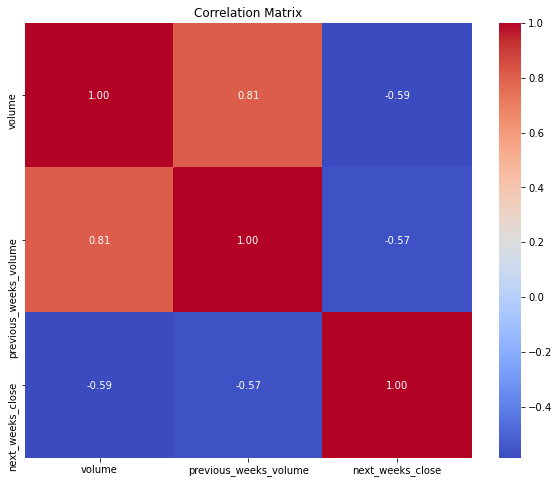

In [9]:
# Calculate correlation matrix for specific columns
correlation_matrix = new_df[['volume','previous_weeks_volume', 'next_weeks_close']].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

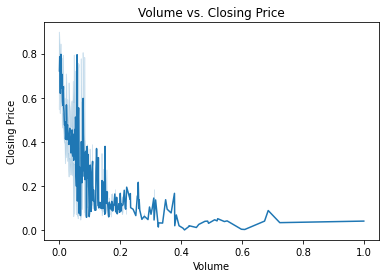

In [10]:
# Plotting volume vs. closing prices with a line
sns.lineplot(data=new_df, x='volume', y='close')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Volume vs. Closing Price')
plt.show()

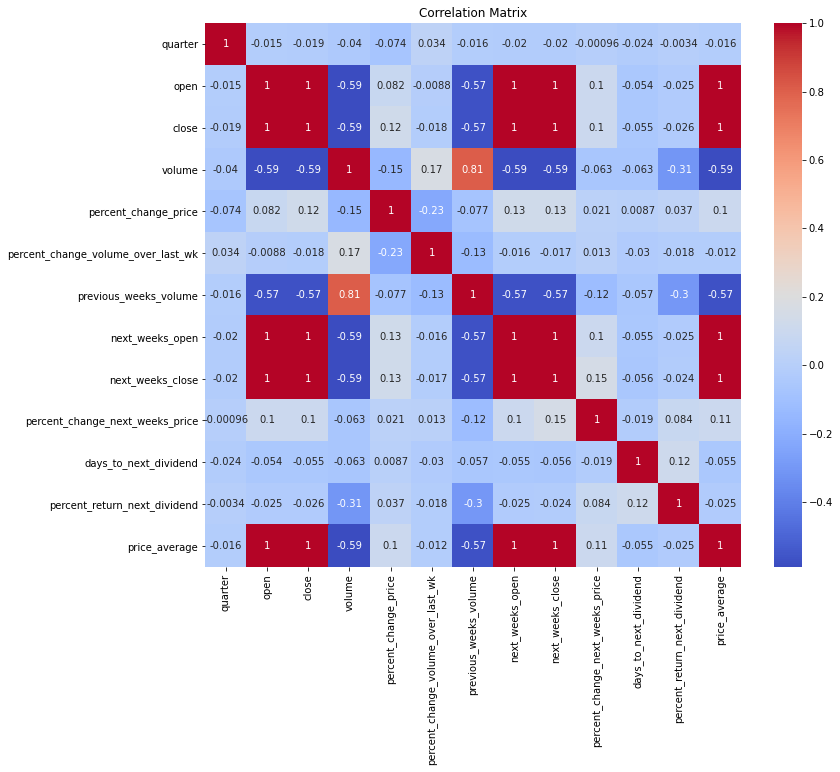

In [16]:
# Plotting general correlation matrix
correlation_matrix = new_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

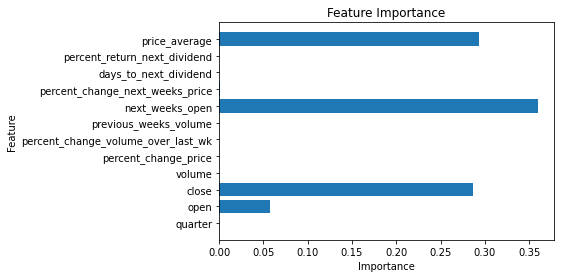

In [12]:
# Separate features and labels
X = new_df.drop(['next_weeks_close','date','stock'], axis=1)
y = new_df['next_weeks_close']

# Fit a random forest regressor model
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Visualize feature importances
plt.barh(X.columns, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [13]:
# Subset for modelling
new_df_subset = new_df[['open', 'close','price_average','volume','next_weeks_open','next_weeks_close']]
# Split the data into features (X) and target variable (y)
X = new_df_subset.drop('next_weeks_close', axis=1)
y = new_df_subset['next_weeks_close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
display(new_df_subset.head(15))

Training set shape: (554, 5) (554,)
Testing set shape: (139, 5) (139,)


,open,close,price_average,volume,next_weeks_open,next_weeks_close
0,0.059,0.063,0.061,0.159,0.066,0.056
1,0.069,0.059,0.060,0.162,0.061,0.054
2,0.063,0.057,0.058,0.089,0.057,0.057
3,0.059,0.060,0.061,0.098,0.061,0.067
4,0.063,0.071,0.067,0.100,0.073,0.070
5,0.076,0.074,0.072,0.073,0.074,0.069
6,0.076,0.073,0.074,0.049,0.069,0.063
7,0.072,0.066,0.064,0.085,0.067,0.062
8,0.070,0.065,0.064,0.069,0.065,0.056
9,0.067,0.059,0.059,0.072,0.058,0.057


Firstly, checked for missing values and data types. Found missing values in percent_change_volume_over_last_wk and previous_weeks_volume, which were due to the first week of the year.

Replaced missing values with 0 to retain data. Converted object data types (with '$') to float.

Dropped rows where opening price was higher than 100, since client only has 100 to invest.

Feature engineering didn’t seem necessary for the task but decided to calculate the average price from high and low columns to reduce columns.

Performed data scaling using MinMaxScaler to scale numerical variables (except percentages) to a range of 0 to 1 to avoid negative values for price variables.

Examined correlation between trading volume and closing prices using a correlation matrix and line plot. Noted a negative correlation due to inverse relationship: higher volume corresponds to lower prices, and vice versa.

Conducted a correlation analysis among all variables. Used Random Forest Regressor for feature importance analysis, with next_weeks_close as the target variable.
Retained open, close, price_average, next_weeks_open, and the current week's volume as features. Removed other variables with negligible correlation or no feature importance.

Lastly, Split the dataset into training and testing sets, with an 80% training and 20% testing split.


## Modelling
In this phase, your main goal is to develop and describe your approach to the solution of the problem. Some guidelines to help you:
* What metrics will you use to evaluate your solutions?
* What are some algorithms that can lead to good results? And why?
* Describe in detail your thought process during the development of your solution.
* Present your results.


-----


Linear Regression:
Training Set Metrics:
MSE: 0.00016771937192401414
MAE: 0.009203229921484174
R^2 Score: 0.997104893367403

Test Set Metrics:
MSE: 0.00020213333592467906
MAE: 0.009621244156738947
R^2 Score: 0.997068894533864

Random Forest Regression:
Training Set Metrics:
MSE: 3.0024755776173354e-05
MAE: 0.003958682310469309
R^2 Score: 0.9994817243315871

Test Set Metrics:
MSE: 0.0002201456690647471
MAE: 0.00991338129496398
R^2 Score: 0.99680770036773


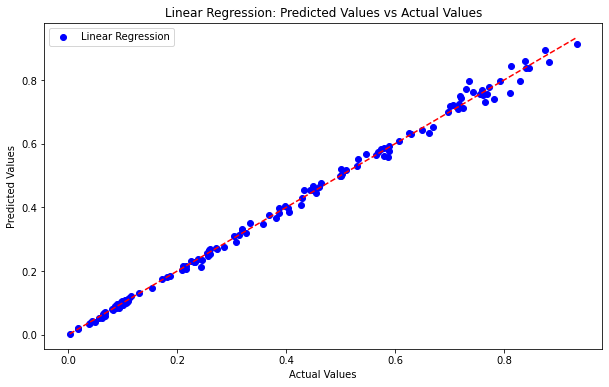

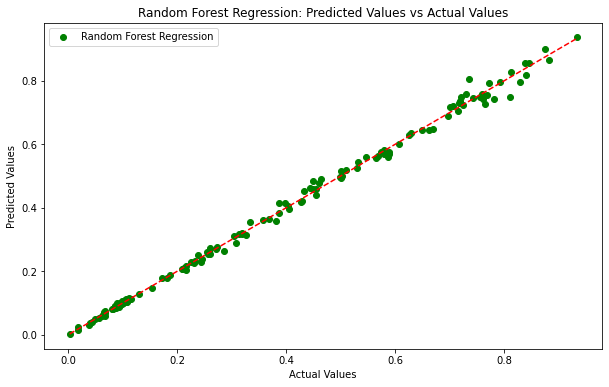

In [14]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions_train = lr_model.predict(X_train)
lr_predictions_test = lr_model.predict(X_test)

lr_mse_train = mean_squared_error(y_train, lr_predictions_train)
lr_mse_test = mean_squared_error(y_test, lr_predictions_test)
lr_mae_train = mean_absolute_error(y_train, lr_predictions_train)
lr_mae_test = mean_absolute_error(y_test, lr_predictions_test)
lr_r2_train = r2_score(y_train, lr_predictions_train)
lr_r2_test = r2_score(y_test, lr_predictions_test)

# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions_train = rf_model.predict(X_train)
rf_predictions_test = rf_model.predict(X_test)

rf_mse_train = mean_squared_error(y_train, rf_predictions_train)
rf_mse_test = mean_squared_error(y_test, rf_predictions_test)
rf_mae_train = mean_absolute_error(y_train, rf_predictions_train)
rf_mae_test = mean_absolute_error(y_test, rf_predictions_test)
rf_r2_train = r2_score(y_train, rf_predictions_train)
rf_r2_test = r2_score(y_test, rf_predictions_test)

# Print the evaluation metrics
print("Linear Regression:")
print("Training Set Metrics:")
print("MSE:", lr_mse_train)
print("MAE:", lr_mae_train)
print("R^2 Score:", lr_r2_train)

print("\nTest Set Metrics:")
print("MSE:", lr_mse_test)
print("MAE:", lr_mae_test)
print("R^2 Score:", lr_r2_test)

print("\nRandom Forest Regression:")
print("Training Set Metrics:")
print("MSE:", rf_mse_train)
print("MAE:", rf_mae_train)
print("R^2 Score:", rf_r2_train)

print("\nTest Set Metrics:")
print("MSE:", rf_mse_test)
print("MAE:", rf_mae_test)
print("R^2 Score:", rf_r2_test)

# Visualize predicted values vs actual values
# Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions_test, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted Values vs Actual Values')
plt.legend()
plt.show()

# Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions_test, color='green', label='Random Forest Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Predicted Values vs Actual Values')
plt.legend()
plt.show()

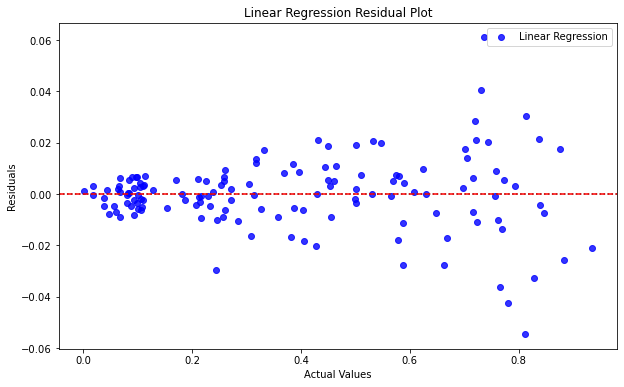

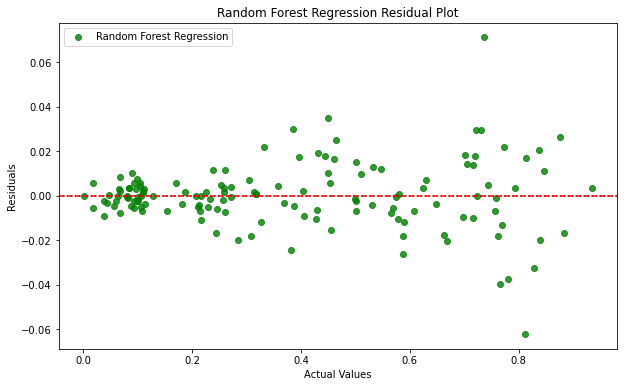

In [15]:
# Residual plot for Linear Regression
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=lr_predictions_test, color='blue', label='Linear Regression')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Linear Regression Residual Plot')
plt.legend()
plt.show()

# Residual plot for Random Forest Regression
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=rf_predictions_test, color='green', label='Random Forest Regression')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Random Forest Regression Residual Plot')
plt.legend()
plt.show()

Started by deciding which model to use, thought regression models would be more adequate for this task. Some of the regression algorithms that can lead to good results would include Linear Regression and Random Forest Tree for their simplicity and effectiveness, and linear regressions models provide interpretable results and allowing for clear visualizations, also, deep learning models, such as Recurrent Neural Networks because they can automatically learn relevant features from raw data, this eliminates the need for explicit feature engineering, where domain knowledge and manual feature selection are required. 

Multiple common regression evaluation metrics were used, the Mean Squared Error to measure the average squared difference between the predicted values and the actual values, the Mean Absolute Error to measure the average absolute difference between the predicted values and the actual values and the R^2 to measure how well the regression model fits the data.

When faced with a very high R^2 score, compared the training set metrics with the test set metrics to see if models could be overfitting, and visualized the residual plot to see if there was randomness, meaning it's not overfitting, which seemed to be the case.   



## Conclusions
In the conclusions, you should enumerate the results you got after completing the challenge.
* How good do you consider your results? 
* What are some factors that would contribute to get better results?
* What are some advantages and disadvantages of your solution?
* What can be done as future work to improve your results?



Concluding, I would consider the results obtained were good, although there are things that still could have been done to try and improve these results, such as fine-tuning the models, mainly the Random Forest Tree, experimenting with different settings for the hyperparameters. And seeing the impact of some of the other columns in the results.

Some factors that would contritube to get better results would be having a large and high-quality dataset with relevant and informative features, more data provides a better representation of the underlying patterns and relationships in the data. Choosing an appropriate model for the task and optimizing its hyperparameters can significantly impact performance. Trying different algorithms and tuning their hyperparameters using techniques like grid search or randomized search can lead to improved results. Also, having a good understanding of the domain and the underlying factors that influence stock market behavior can help in selecting relevant features, identifying meaningful patterns, and making more informed decisions during the process.

An advantage of this solution would be it's simplicity and interpretability, on the other hand, a disadvantage would be that it's not very in-depth, investing in the stock market has it's risks, so a more in-depth approach would be necessary.


#### Feedback

Struggled with the domain, but it was a good way to acquired some knowledge on the stock market domain.
Indecisive between 'close' and 'next_weeks_close' for target value


To submit your solution you should e-mail us this notebook in response to the e-mail you initially received with the challenge.